In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

In [2]:
import numpy as np

In [3]:
import torch

In [4]:
import gym

In [5]:
import time

In [6]:
from gym.envs.registration import register
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
    max_episode_steps=100,
    reward_threshold=0.78, # optimum = .8196
)

In [7]:
env = gym.make('FrozenLakeNotSlippery-v0')
#env = gym.make('FrozenLake-v0')

In [8]:
number_of_states=env.observation_space.n
number_of_actions=env.action_space.n

In [9]:
Q=torch.zeros([number_of_states,number_of_actions])

In [10]:
gamma=0.9

In [11]:
egreedy=0.7

In [12]:
egreedy_final=0.1
egreedy_decay=0.999

In [14]:
%%time


num_episodes=1000

steps_total=np.full([num_episodes],-999,dtype=np.int32)
rewards_total=np.full([num_episodes],-999,dtype=np.float32)
egreedy_total=np.full([num_episodes],-999,dtype=np.float32)

for i_episode in range(num_episodes):
    
    state = env.reset()
    #for step in range(100):
    step=0
    #print("____INITIAL STATE____")
    #env.render()
    #print("^^^^^^^^^^^^^^^^^^^^^")
    while True:
        
        step+=1
        
        random_for_egreedy=torch.rand(1).item()
        
        if random_for_egreedy>egreedy:
            Q_eps=0.001*torch.randn([number_of_actions])
            action=torch.argmax(Q[state]+Q_eps).item()
        else:
            action=env.action_space.sample()
                
        if egreedy>egreedy_final:
            egreedy*=egreedy_decay
            
        new_state, reward, done, info = env.step(action)
        
        Q[state,action]=reward+gamma *torch.max(Q[new_state]).item()
        
        state=new_state
        
        #time.sleep(0.4)
        #print("------------------------")
        #env.render() 
        #print("++++++++++++++++++++++++")
        #print('new state: ',new_state)
        #print('info: ', info)
        
        #show_state(env.env,i_episode,step)
        
        if done:
            steps_total[i_episode]=step
            rewards_total[i_episode]=reward
            egreedy_total[i_episode]=egreedy
            print("Episode finished after: {}".format(step))
            break
        

Episode finished after: 7
Episode finished after: 5
Episode finished after: 12
Episode finished after: 14
Episode finished after: 2
Episode finished after: 2
Episode finished after: 9
Episode finished after: 15
Episode finished after: 5
Episode finished after: 10
Episode finished after: 7
Episode finished after: 15
Episode finished after: 8
Episode finished after: 4
Episode finished after: 5
Episode finished after: 6
Episode finished after: 4
Episode finished after: 6
Episode finished after: 5
Episode finished after: 5
Episode finished after: 4
Episode finished after: 6
Episode finished after: 12
Episode finished after: 3
Episode finished after: 8
Episode finished after: 4
Episode finished after: 3
Episode finished after: 2
Episode finished after: 4
Episode finished after: 12
Episode finished after: 12
Episode finished after: 16
Episode finished after: 13
Episode finished after: 3
Episode finished after: 7
Episode finished after: 13
Episode finished after: 5
Episode finished after: 9
E

Episode finished after: 6
Episode finished after: 6
Episode finished after: 8
Episode finished after: 6
Episode finished after: 6
Episode finished after: 6
Episode finished after: 7
Episode finished after: 8
Episode finished after: 10
Episode finished after: 6
Episode finished after: 6
Episode finished after: 6
Episode finished after: 8
Episode finished after: 6
Episode finished after: 6
Episode finished after: 6
Episode finished after: 6
Episode finished after: 4
Episode finished after: 6
Episode finished after: 6
Episode finished after: 2
Episode finished after: 16
Episode finished after: 6
Episode finished after: 6
Episode finished after: 9
Episode finished after: 8
Episode finished after: 6
Episode finished after: 7
Episode finished after: 4
Episode finished after: 6
Episode finished after: 6
Episode finished after: 6
Episode finished after: 7
Episode finished after: 6
Episode finished after: 7
Episode finished after: 7
Episode finished after: 3
Episode finished after: 6
Episode fi

Episode finished after: 8
Episode finished after: 6
Episode finished after: 8
Episode finished after: 6
Episode finished after: 6
Episode finished after: 6
Episode finished after: 6
Episode finished after: 6
Episode finished after: 6
Episode finished after: 2
Episode finished after: 4
Episode finished after: 6
Episode finished after: 6
Episode finished after: 6
Episode finished after: 7
Episode finished after: 6
Episode finished after: 6
Episode finished after: 6
Episode finished after: 6
Episode finished after: 8
Episode finished after: 6
Episode finished after: 6
Episode finished after: 6
Episode finished after: 8
Episode finished after: 4
Episode finished after: 6
Episode finished after: 12
Episode finished after: 8
Episode finished after: 6
Episode finished after: 6
Episode finished after: 6
Episode finished after: 5
Episode finished after: 6
Episode finished after: 6
Episode finished after: 6
Episode finished after: 8
Episode finished after: 6
Episode finished after: 7
Episode fin

In [15]:
print("Average number of steps: {}". format(np.average(steps_total)))

Average number of steps: 6.592


In [16]:
print("Average number of steps in last 100 episodes: {}". format(np.average(steps_total[-100:])))

Average number of steps in last 100 episodes: 6.25


In [17]:
print("Fraction of episodes finished succesfully {}".format(np.average(rewards_total)))

Fraction of episodes finished succesfully 0.6679999828338623


In [18]:
print("Fraction of episodes finished succesfully in last 100 episodes {}".format(np.average(rewards_total[-100:])))

Fraction of episodes finished succesfully in last 100 episodes 0.8700000047683716


In [19]:
print(Q)

tensor([[0.5314, 0.5905, 0.5905, 0.5314],
        [0.5314, 0.0000, 0.6561, 0.5905],
        [0.5905, 0.7290, 0.5905, 0.6561],
        [0.6561, 0.0000, 0.5905, 0.0000],
        [0.5905, 0.6561, 0.0000, 0.5314],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.8100, 0.0000, 0.6561],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.6561, 0.0000, 0.7290, 0.5905],
        [0.6561, 0.6561, 0.8100, 0.0000],
        [0.7290, 0.9000, 0.0000, 0.7290],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.6561, 0.0000, 0.7290],
        [0.6561, 0.9000, 1.0000, 0.8100],
        [0.0000, 0.0000, 0.0000, 0.0000]])


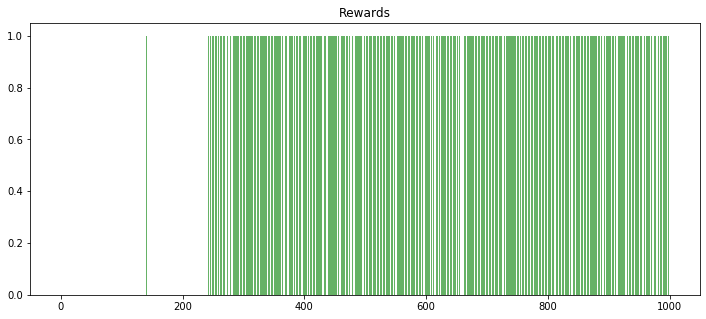

In [21]:
plt.figure(1,figsize=[12,5])
plt.title("Rewards")
plt.bar(torch.arange(len(rewards_total)), rewards_total,alpha=0.6, color='green')
#plt.plot(rewards_total)
plt.show()

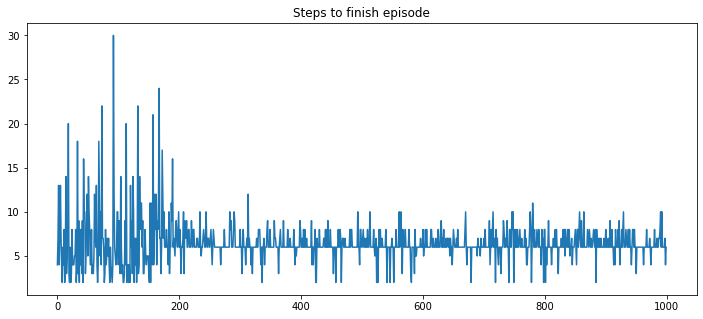

In [23]:
plt.figure(2,figsize=[12,5])
plt.title("Steps to finish episode")
plt.plot(steps_total)
plt.show()

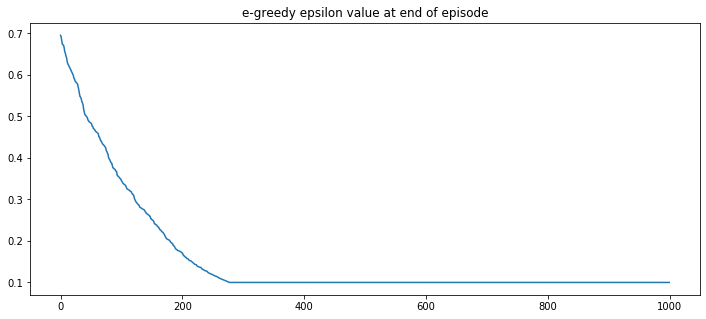

In [22]:
plt.figure(3,figsize=[12,5])
plt.title("e-greedy epsilon value at end of episode")
plt.plot(egreedy_total)
plt.show()